In [8]:
from Util_methods import rgb2Red,preprocess
import cv2
import matplotlib.pyplot as plt

In [9]:
def rgb_show(img):
    plt.figure(facecolor="w")
    # img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    # plt.xticks([]),plt.yticks([])
    plt.show()

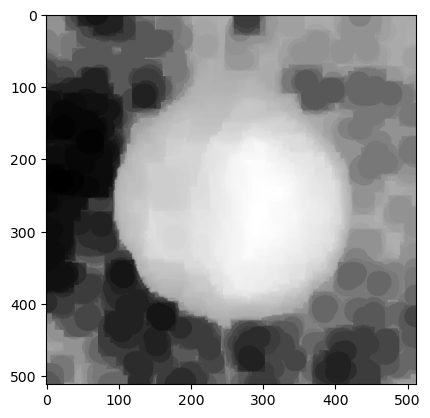

In [10]:
roi=cv2.imread("/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/train/disc_small/image/gdrishtiGS_002.png")
preprocessed_roi = preprocess(roi)
rgb_show(preprocessed_roi)

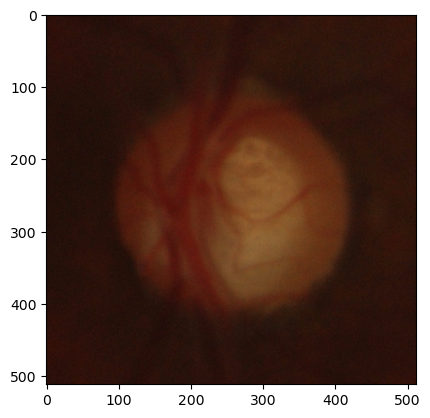

In [34]:
rgb_show(roi)


In [18]:
type(roi)

numpy.ndarray

In [26]:
roi.shape

(512, 512, 3)

In [28]:

import numpy as np
x1=np.expand_dims(preprocessed_roi,axis=2)

x1.shape

(512, 512, 1)

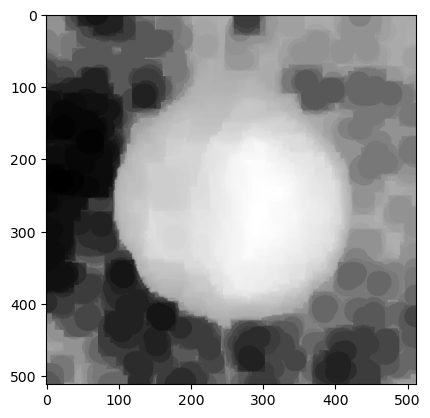

In [43]:
new_=cv2.merge([x1,x1,x1])
rgb_show(new_)

In [59]:
new_.shape

(512, 512, 3)

In [107]:
x_new=np.stack([new_,roi])
x_new.shape

(2, 512, 512, 3)

In [69]:
x3=new_*3-roi*2

In [70]:
x3.shape

(512, 512, 3)

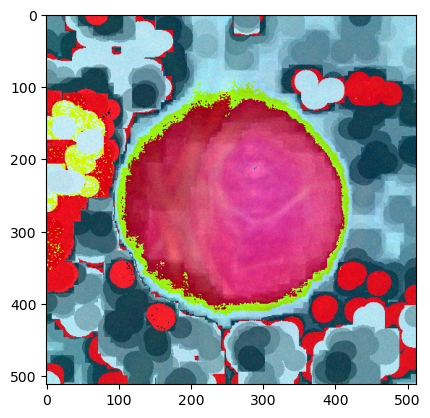

In [71]:
rgb_show(x3)

In [75]:
from PIL import Image
import numpy as np
import math

def rgb_to_polar(image_path, output_path):
    # 读取RGB图片
    rgb_image = Image.open(image_path)
    
    # 转换为数组
    rgb_array = np.array(rgb_image)
    
    # 获取图像尺寸
    width, height, _ = rgb_array.shape
    
    # 创建新的图像数组（极坐标形式）
    polar_array = np.zeros((width, height, 3), dtype=np.uint8)
    
    # 计算图像中心点坐标
    center_x = width // 2
    center_y = height // 2
    
    # 遍历图像中的每个像素
    for x in range(width):
        for y in range(height):
            # 计算像素点与中心点的距离和角度
            dx = x - center_x
            dy = y - center_y
            distance = math.sqrt(dx**2 + dy**2)
            angle = math.atan2(dy, dx)
            
            # 将角度映射到[0, 255]的范围内
            mapped_angle = int((angle + math.pi) / (2 * math.pi) * 255)
            
            # 将距离映射到[0, 255]的范围内
            mapped_distance = int(distance / math.sqrt(center_x**2 + center_y**2) * 255)
            
            # 将极坐标值映射回RGB值
            polar_array[x, y, 0] = mapped_distance  # R通道
            polar_array[x, y, 1] = mapped_angle     # G通道
            polar_array[x, y, 2] = rgb_array[x, y, 2]  # B通道保持不变
    
    # 创建新的图像对象
    polar_image = Image.fromarray(polar_array)
    
    # 保存为文件
    polar_image.save(output_path)


# 使用示例
image_path = '/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/train/disc_small/image/gdrishtiGS_002.png'
output_path = 'output_polar_image.jpg'
rgb_to_polar(image_path, output_path)


In [111]:
import cv2
import numpy as np

def rgb_to_polar(image_path, output_path):
    # 读取RGB图片
    rgb_image = cv2.imread(image_path)
    
    # 将RGB图片转换为HSV颜色空间
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    
    # 提取H、S通道
    h_channel = hsv_image[:, :, 0]
    s_channel = hsv_image[:, :, 1]
    
    # 构建极坐标图像
    polar_image = np.zeros_like(rgb_image)
    polar_image[:,:,0] = h_channel
    polar_image[:,:,1] = s_channel
    polar_image[:,:,2] = 255  # 将V通道设置为最大值，使得图像呈现彩色
    
    # 保存为文件
    cv2.imwrite(output_path, polar_image)

def polar_to_rgb(image_path, output_path):
    # 读取极坐标图片
    polar_image = cv2.imread(image_path)
    
    # 将极坐标图片转换为HSV颜色空间
    hsv_image = np.zeros_like(polar_image)
    hsv_image[:,:,0] = polar_image[:,:,0]
    hsv_image[:,:,1] = polar_image[:,:,1]
    hsv_image[:,:,2] = 255  # 将V通道设置为最大值，使得图像呈现彩色
    
    # 将HSV图片转换为RGB颜色空间
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    
    # 保存为文件
    cv2.imwrite(output_path, rgb_image)

# 示例用法
image_path = "/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/train/disc_small/image/gdrishtiGS_012.png"
polar_output_path = "polar_output_012.jpg"
rgb_output_path = "rgb_output_012.jpg"

# 将RGB图片转换为极坐标形式
rgb_to_polar(image_path, polar_output_path)

# 将极坐标图片转换为RGB形式
polar_to_rgb(polar_output_path, rgb_output_path)


In [114]:
import cv2
import numpy as np

def rgb_to_polar(image_path, output_path):
    # 读取RGB图片
    rgb_image = cv2.imread(image_path)
    
    # 转换为浮点数类型
    rgb_image_float = rgb_image.astype(np.float32) / 255.0
    
    # 将RGB图片转换为HSV颜色空间
    hsv_image = cv2.cvtColor(rgb_image_float, cv2.COLOR_BGR2HSV)
    
    # 提取H通道（角度信息）和V通道（距离信息）
    h_channel = hsv_image[:,:,0] * 2 * np.pi  # 角度范围：[0, 2π]
    v_channel = hsv_image[:,:,2]  # 距离范围：[0, 1]
    
    # 创建极坐标图像
    polar_image = np.zeros_like(rgb_image)
    
    # 计算图像中心点坐标
    center_x = rgb_image.shape[1] // 2
    center_y = rgb_image.shape[0] // 2
    
    # 计算极坐标图像的通道值
    polar_image[:,:,0] = v_channel * center_x  # R通道（距离）
    polar_image[:,:,1] = h_channel * 255      # G通道（角度）
    polar_image[:,:,2] = rgb_image[:,:,2]     # B通道保持不变
    
    # 保存为文件
    cv2.imwrite(output_path, polar_image)

def polar_to_rgb(image_path, output_path):
    # 读取极坐标图片
    polar_image = cv2.imread(image_path)
    
    # 转换为浮点数类型
    polar_image_float = polar_image.astype(np.float32)
    
    # 计算图像中心点坐标
    center_x = polar_image.shape[1] // 2
    center_y = polar_image.shape[0] // 2
    
    # 创建直角坐标图像
    rgb_image = np.zeros_like(polar_image)
    
    # 提取极坐标图像的通道值
    v_channel = polar_image_float[:,:,0] / center_x  # 距离范围：[0, 1]
    h_channel = polar_image_float[:,:,1] / 255      # 角度范围：[0, 1]
    
    # 将直角坐标图像的通道值设置为相应的RGB值
    rgb_image[:,:,0] = v_channel * np.cos(h_channel * 2 * np.pi) * 255  # B通道
    rgb_image[:,:,1] = v_channel * np.sin(h_channel * 2 * np.pi) * 255  # G通道
    rgb_image[:,:,2] = polar_image[:,:,2]                                # R通道保持不变
    
    # 保存为文件
    cv2.imwrite(output_path, rgb_image)

# 示例用法
image_path = "/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/test/disc_small/image/gdrishtiGS_005.png"
polar_output_path = "polar_output_005.jpg"
rgb_output_path = "rgb_output_005.jpg"

# RGB图片转换为极坐标
rgb_to_polar(image_path, polar_output_path)

# 极坐标图片转换为RGB
polar_to_rgb(polar_output_path, rgb_output_path)


In [83]:
import cv2
import numpy as np

# 加载图像
image = cv2.imread('/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/train/disc_small/image/gdrishtiGS_012.png')

# 转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 将灰度图像转换为浮点数类型
gray_float = np.float32(gray)

# 应用cv2.cartToPolar函数进行极坐标转换
magnitude, angle = cv2.cartToPolar(gray_float, gray_float)

# 将极坐标转换为8位整数类型（0-255）
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
angle = cv2.normalize(angle, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# 保存转换后的图像
cv2.imwrite('magnitude_image.jpg', magnitude)
cv2.imwrite('angle_image.jpg', angle)


True

In [85]:
import cv2
import numpy as np

# 加载图像
image = cv2.imread('/home/wzc/zlt_self/ZNewMyModel/data/refuge/test/image/T0001.jpg')


# 获取图像尺寸
height, width = image.shape[:2]

# 计算中心点坐标
center = (width // 2, height // 2)

# 计算图像的最大半径
radius = min(width, height) // 2

# 应用cv2.linearPolar函数进行极坐标转换
polar_image = cv2.linearPolar(image, center, radius, cv2.WARP_FILL_OUTLIERS)

# 保存转换后的图像
cv2.imwrite('polar_image.jpg', polar_image)


True